___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [ ]:
#from pandas_datareader import data, wb
import pandas as pd
#import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [ ]:
cust = pd.read_csv(r'C:\Users\97250\Desktop\studied\R ,python\ניתוח מידע\חומר קורס ניתוח מידע\Ecommerce Customers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [ ]:
cust.head()

In [ ]:
cust.info()

In [ ]:
cust.describe()


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=cust)

** Do the same but with the Time on App column instead. **

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=cust)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

In [ ]:
sns.jointplot(x='Time on App',y='Length of Membership',data=cust,kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

In [ ]:
sns.pairplot(cust)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data = cust)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=cust[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [ ]:
y=cust['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm =LinearRegression().fit(X_train,y_train)

**Create an instance of a LinearRegression() model named lm.**

lm

** Train/fit lm on the training data.**

In [ ]:
lm

**Print out the coefficients of the model**

In [ ]:
lm.coef_


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [ ]:
prediction = lm.predict(X_test)

In [22]:
import statistics as st
import math

** Create a scatterplot of the real test values versus the predicted values. **

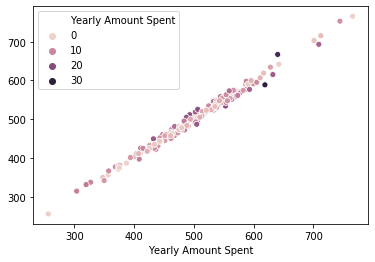

In [17]:
sns.scatterplot(x = y_test,y = prediction, hue =(abs(prediction-y_test)))

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [25]:

MAE = st.mean(abs(prediction-y_test))
MSE = st.mean((prediction-y_test)**2)
RMSE= math.sqrt(st.mean((prediction-y_test)**2))
print(MAE,MSE,RMSE,sep = '\n')

7.2281486534308375
79.81305165097461
8.933815066978642


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [49]:
residuals=(y_test-prediction)

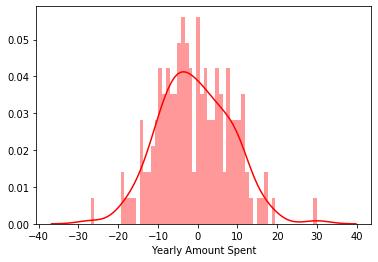

In [52]:
sns.distplot(residuals,bins = 60,color='red')

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **


In [42]:
coefficient = lm.coef_
col  = ['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']
pd.DataFrame(coefficient,col,columns = ['coefficient'])

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

every unit of the class we check , the following units are affected

**Do you think the company should focus more on their mobile app or on their website?**

on app. yet Length Of Membership is the highest correlated with

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.